In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import generate_square

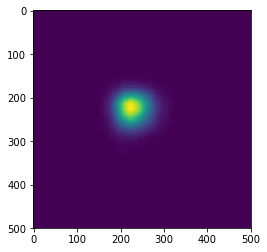

In [3]:
# Initialize 1000 squares with center (x,y) and size (x,y) following a gaussian distribution

np.random.seed(1234)
shape = (500, 500)
arr_smooth = np.zeros(shape)
center = np.random.normal(200, 20, size=2000).reshape((1000, 2))
size = np.random.normal(50, 20, size=2000).reshape((1000, 2))

for i in range(1000):
    arr_smooth += generate_square(shape, center[i], size[i])

plt.imshow(arr_smooth)
plt.show()

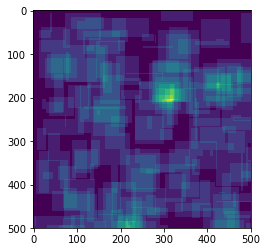

In [4]:
# Initialize 1000 squares with center (x,y) and size (x,y) following an uniform distribution
np.random.seed(1066)
arr = np.zeros(shape)
center = np.random.random(400).reshape((200, 2)) * arr.shape[0]
size = np.random.random(400).reshape((200, 2)) * arr.shape[0] // 5

for i in range(200):
    arr += generate_square(shape, center[i], size[i])

plt.imshow(arr)
plt.show()

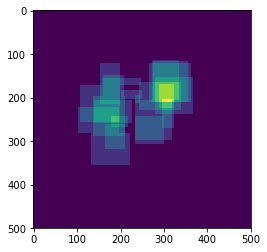

In [5]:
# One by one, generate the uniform distribution of square and compute their overlap using 3 metrics
# Dice, Weigthed-Dice and Correlation, those with good (enough) score should be kept

np.random.seed(1066)
arr = np.zeros(shape)
center = np.random.random(400).reshape((200, 2)) * arr.shape[0]
size = np.random.random(400).reshape((200, 2)) * arr.shape[0] // 5

def compute_dice_voxel(density_1, density_2):
    overlap_idx = np.nonzero(density_1 * density_2)
    numerator = 2 * len(overlap_idx[0])
    denominator = np.count_nonzero(density_1) + np.count_nonzero(density_2)

    if denominator > 0:
        dice = numerator / float(denominator)
    else:
        dice = np.nan

    overlap_1 = density_1[overlap_idx]
    overlap_2 = density_2[overlap_idx]
    w_dice = np.sum(overlap_1) + np.sum(overlap_2)
    denominator = np.sum(density_1) + np.sum(density_2)
    if denominator > 0:
        w_dice /= denominator
    else:
        w_dice = np.nan

    return dice, w_dice


def compute_correlation(density_1, density_2):
    indices = np.where(density_1 + density_2 > 0)
    if np.array_equal(density_1, density_2):
        density_correlation = 1
    elif (np.sum(density_1) > 0 and np.sum(density_2) > 0) \
            and np.count_nonzero(density_1 * density_2):
        density_correlation = np.corrcoef(density_1[indices],
                                          density_2[indices])[0, 1]
    else:
        density_correlation = 0

    return max(0, density_correlation)

arr = np.zeros(shape)
for i in range(200):
    curr = generate_square(shape, center[i], size[i])
    dice, w_dice = compute_dice_voxel(arr_smooth, curr)
    corr = compute_correlation(arr_smooth, curr)
    # This value of 0.1 control how strict the search is
    if dice + w_dice + corr > 0.1:
        arr += curr

plt.imshow(arr)
plt.show()

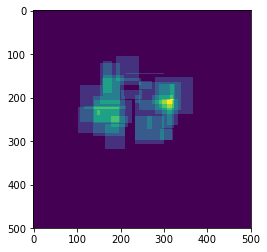

In [6]:
# One by one, generate the uniform distribution of square and compute their overlap using a distance to barrycenter

np.random.seed(1066)
arr = np.zeros(shape)
center = np.random.random(400).reshape((200, 2)) * arr.shape[0]
size = np.random.random(400).reshape((200, 2)) * arr.shape[0] // 5

pos_smooth = np.where(arr_smooth)
val_smooth = arr_smooth[pos_smooth]
center_smooth = np.average(pos_smooth, axis=1, weights=val_smooth)
for i in range(200):
    curr = generate_square(shape, center[i], size[i])
    pos = np.where(curr)
    if len(pos[0]) > 1:
        pos = np.average(pos, axis=1)
        # This value represent a distance in pixel
        if np.linalg.norm(pos - center_smooth) < 100:
            arr += curr

plt.imshow(arr)
plt.show()